In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the data into a pandas DataFrame
data = {
    'Highest Temperature': [25, 26, 24, 27, 25, 26, 24, 27, 25, 26, 24, 27, 25, 26, 24, 27],
    'Lowest Temperature': [10, 12, 11, 13, 10, 12, 11, 13, 10, 12, 11, 13, 10, 12, 11, 13],
    'Rainfall': [400, 380, 410, 390, 400, 380, 410, 390, 400, 380, 410, 390, 400, 380, 410, 390],
    'Humidity': [60, 62, 58, 63, 60, 62, 58, 63, 60, 62, 58, 63, 60, 62, 58, 63],
    'Crop Yield': [2500, 2550, 2450, 2600, 2500, 2550, 2450, 2600, 2500, 2550, 2450, 2600, 2500, 2550, 2450, 2600],
    'Irrigation Frequency': [15, 16, 14, 17, 15, 16, 14, 17, 15, 16, 14, 17, 15, 16, 14, 17]
}

In [25]:
df = pd.DataFrame(data)

In [26]:
# Separate the features and target variables
X = df[['Highest Temperature', 'Lowest Temperature', 'Rainfall', 'Humidity']]
y_yield = df['Crop Yield']
y_irrigation = df['Irrigation Frequency']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_yield_train, y_yield_test, y_irrigation_train, y_irrigation_test = train_test_split(X, y_yield, y_irrigation, test_size=0.2, random_state=42)

In [28]:
# Train the random forest model for Crop Yield prediction
yield_model = RandomForestRegressor(n_estimators=100, random_state=42)
yield_model.fit(X_train, y_yield_train)


RandomForestRegressor(random_state=42)

In [29]:
# Train the random forest model for Irrigation Frequency prediction
irrigation_model = RandomForestRegressor(n_estimators=100, random_state=42)
irrigation_model.fit(X_train, y_irrigation_train)


RandomForestRegressor(random_state=42)

In [30]:
# Calculate R-squared (r2) and Mean Squared Error (MSE) for Crop Yield
yield_prediction_train = yield_model.predict(X_train)
r2_yield_train = r2_score(y_yield_train, yield_prediction_train)
mse_yield_train = mean_squared_error(y_yield_train, yield_prediction_train)
print("Crop Yield (Train) - R2:", r2_yield_train)
print("Crop Yield (Train) - MSE:", mse_yield_train)

Crop Yield (Train) - R2: 0.9996216748768473
Crop Yield (Train) - MSE: 1.3333333333333333


In [31]:
# Calculate R-squared (r2) and Mean Squared Error (MSE) for Irrigation Frequency
irrigation_prediction_train = irrigation_model.predict(X_train)
r2_irrigation_train = r2_score(y_irrigation_train, irrigation_prediction_train)
mse_irrigation_train = mean_squared_error(y_irrigation_train, irrigation_prediction_train)
print("Irrigation Frequency (Train) - R2:", r2_irrigation_train)
print("Irrigation Frequency (Train) - MSE:", mse_irrigation_train)

Irrigation Frequency (Train) - R2: 0.9996216748768473
Irrigation Frequency (Train) - MSE: 0.0005333333333333224


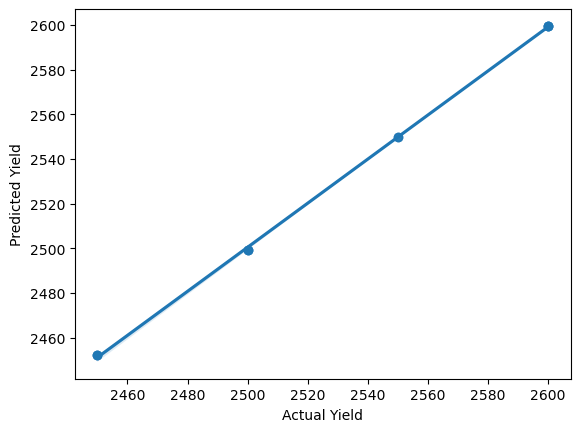

In [32]:
# Plot regression plot for Actual Yield vs. Predicted Yield
results = pd.DataFrame({'Actual':y_yield_train,'Predicted':yield_prediction_train})
sns.regplot(x='Actual', y='Predicted', data=results)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.show()

In [33]:
# New data for prediction
new_data = {
    'Highest Temperature': [26],
    'Lowest Temperature': [12],
    'Rainfall': [380],
    'Humidity': [62]
}

In [34]:
# Convert the new data to a DataFrame
new_df = pd.DataFrame(new_data)

In [35]:
# Make predictions for Crop Yield and Irrigation Frequency
yield_prediction = yield_model.predict(new_df)
irrigation_prediction = irrigation_model.predict(new_df)


In [36]:
print("Crop Yield Prediction:", yield_prediction[0])
print("Irrigation Frequency Prediction:", irrigation_prediction[0])

Crop Yield Prediction: 2550.0
Irrigation Frequency Prediction: 16.0
